## Churn
### The rate at which customers stop using a company's services or cancel their subscriptions within a specific time period

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#check the data set
df = pd.read_csv("D:\\Data_Science\\Datasets\\Kaggle_data\\Telecom Churn Dataset\\churn-bigml-80.csv")

#show the datasets
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# check the shape of dataset
a = df.shape

print(f"Dataset has {a[0]} rows and {a[1]} columns")

Dataset has 2666 rows and 20 columns


In [4]:
# check the column name from the data
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [5]:
#see the more info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
# Check the null values if any 
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
# Explore basic statistical charectristic from data
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# to check statistical feature for the non numerical data
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,2666,2666,2666,2666
unique,51,2,2,2
top,WV,No,No,False
freq,88,2396,1933,2278


In [9]:
# lets check the distribution of the churn col
df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [10]:
# calculate the percentage of the above data
df['Churn'].value_counts(normalize=True)

False    0.854464
True     0.145536
Name: Churn, dtype: float64

In [11]:
# what is the proportion of churned users in our dataframe
b = df['Churn'].mean()
print(f'Average churn user from the dataset is "{b:.3f}"')

Average churn user from the dataset is "0.146"


In [12]:
# What are average values of numerical features for churned users

df[df['Churn'] == 1].mean()

Account length            102.319588
Area code                 437.543814
Number vmail messages       5.170103
Total day minutes         205.181186
Total day calls           101.195876
Total day charge           34.881340
Total eve minutes         209.385309
Total eve calls            99.948454
Total eve charge           17.797861
Total night minutes       205.307216
Total night calls         100.682990
Total night charge          9.238892
Total intl minutes         10.819330
Total intl calls            4.051546
Total intl charge           2.921727
Customer service calls      2.206186
Churn                       1.000000
dtype: float64

In [13]:
# What are average values of numerical features for non churned users
df[df['Churn'] == 0].mean()

Account length            100.330992
Area code                 437.420983
Number vmail messages       8.507463
Total day minutes         175.104346
Total day calls           100.159350
Total day charge           29.768266
Total eve minutes         198.853380
Total eve calls           100.036435
Total eve charge           16.902809
Total night minutes       200.464091
Total night calls         100.007902
Total night charge          9.020975
Total intl minutes         10.137840
Total intl calls            4.538191
Total intl charge           2.737709
Customer service calls      1.453029
Churn                       0.000000
dtype: float64

In [14]:
# How much time (on average) do churned users spend on the phone during daytime?
avg_time = df[df['Churn'] == 1]['Total day minutes'].mean()
print(f'Average time churned users spent on phone during daytime is "{avg_time:.3f}" minutes.')

Average time churned users spent on phone during daytime is "205.181" minutes.


In [15]:
# What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?
max_len_int_call = df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()
max_len_int_call

18.9

In [16]:
# select all states starting with "W"
w_state = df[df['State'].apply (lambda x : x[0] == 'W')]

# see how many users lives in a state with initial W
len(w_state)

263

In [17]:
# see how the observations in our sample are distributed in the context of two variables - Churn and International plan

churn_int_plan = pd.crosstab(df['Churn'],df['International plan'])
churn_int_plan

International plan,No,Yes
Churn,,
False,2126,152
True,270,118


In [18]:
# check the percentage of voice mail plan among the users

churn_voice_mail_plan = pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)
print(f'below is the table: \n\n{churn_voice_mail_plan}')

below is the table: 

Voice mail plan        No       Yes
Churn                              
False            0.603901  0.250563
True             0.121155  0.024381


In [19]:
# see how churn rate is related to the International plan feature

churn_rate_int_plan = pd.crosstab(df['Churn'], df['International plan'], margins = True)
print(churn_rate_int_plan)

International plan    No  Yes   All
Churn                              
False               2126  152  2278
True                 270  118   388
All                 2396  270  2666


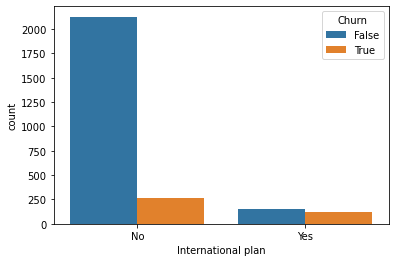

In [20]:
sns.countplot(x="International plan", hue="Churn", data=df);

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

In [21]:
# compare churn datasets with Customer service calls

service_call = pd.crosstab(df['Churn'], df['Customer service calls'])
print(service_call)

Customer service calls    0    1    2    3   4   5   6  7  8  9
Churn                                                          
False                   476  846  546  311  69  20   7  3  0  0
True                     79   99   62   37  64  29  10  5  1  2


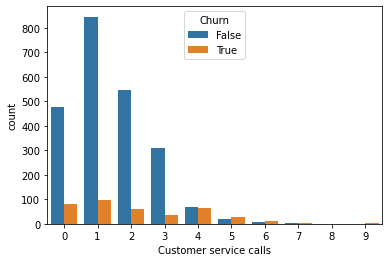

In [22]:
sns.countplot(x = 'Customer service calls', hue ='Churn', data = df);

Add a binary feature to our DataFrame – Customer service calls > 3

In [23]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2179,277,2456
1,99,111,210
All,2278,388,2666


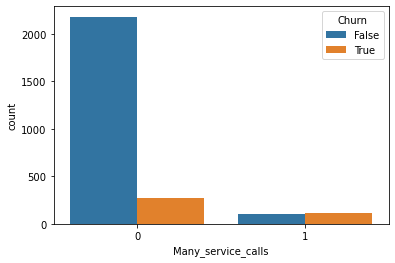

In [24]:
sns.countplot(x = 'Many_service_calls', hue = 'Churn', data = df);